# WeatherPy
----

### Analysis
* As expected, the weather becomes warmer as the cities used in the data move closer to the equator. And given it is currently summer in the southern hemisphere and winter in the northern hemisphere, temperatures in the southern hemisphere are significantly warmer than those in the northern hemisphere. Plus as we move further north from the equator the temperatures continue to drop.
* There's no strong relationship betwwen humidity and the equator but it's interesting to see that the northern hemisphere is more humid than the southern hemisphere.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that as we move futher north it seems to get cloudier. That coupled with humidity and temperature could mean those countries are currently seeing snowstorms.
* There is no strong relationship between latitude and wind speed. There is one city in the norhtern hemisphere that seems to be seeing some really strong wind today. 
* In all the data show it's pretty apparent the northern hemisphere is still in the thick of winter and are likely seeing some winter storms today.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_pd = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [43]:
# make empty lists to add data to
city=[]
Lat=[]
Lon=[]
Humidity=[]
Temp=[]
Windspeed=[] 
Cloudiness=[]
Date=[]

In [48]:
# make api calls
print("-------------------")
print("Beginning Data Retrieval")
print("-------------------")
for city in cities:
    target_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=IMPERIAL&appid={api_key}"
    response = requests.get(target_url).json()

    try:
        
        Lon.append(response['coord']['lon'])
        Lat.append(response['coord']['lat'])
        Humidity.append(response['main']['humidity'])
        Temp.append(response['main']['temp'])
        Windspeed.append(response['wind']['speed'])
        Cloudiness.append(response['clouds']['all'])
        Date.append(response['dt'])
    except:
            print("City info not found... skip.")
print("---------------------")
print("End of Data Retrieval")

-------------------
Beginning Data Retrieval
-------------------
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City info not found... skip.
City in

In [50]:
# make a datafram
cities_data = {'City': city,
              'Lat': Lat,
              'Lon': Lon,
              'Humidity': Humidity,
              'Temp': Temp,
              'Windspeed': Windspeed,
              'Cloudiness': Cloudiness,
              'Date': Date}
cities_data_df=pd.DataFrame(cities_data)

cities_data_df.head()

,City,Lat,Lon,Humidity,Temp,Windspeed,Cloudiness,Date
0,bull savanna,-41.87,-73.83,71,55.40,6.93,20,1552518000
1,bull savanna,32.87,74.73,87,51.80,3.62,40,1552518000
2,bull savanna,15.86,-97.07,70,86.00,8.05,5,1552516800
3,bull savanna,-33.02,27.91,100,71.43,12.91,92,1552521065
4,bull savanna,-53.16,-70.91,81,48.11,5.82,75,1552521191


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
# export dataframe as csv
cities_data_df.to_csv("weather_data.csv", index=False)

In [54]:
len(cities_data_df)

554

In [55]:
#import csv to use for plots
cities_data_csv = pd.read_csv("weather_data.csv")

cities_data_csv.head()

,City,Lat,Lon,Humidity,Temp,Windspeed,Cloudiness,Date
0,bull savanna,-41.87,-73.83,71,55.40,6.93,20,1552518000
1,bull savanna,32.87,74.73,87,51.80,3.62,40,1552518000
2,bull savanna,15.86,-97.07,70,86.00,8.05,5,1552516800
3,bull savanna,-33.02,27.91,100,71.43,12.91,92,1552521065
4,bull savanna,-53.16,-70.91,81,48.11,5.82,75,1552521191


In [69]:
cities_data_csv.dtypes

City           object
Lat           float64
Lon           float64
Humidity        int64
Temp          float64
Windspeed     float64
Cloudiness      int64
Date            int64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

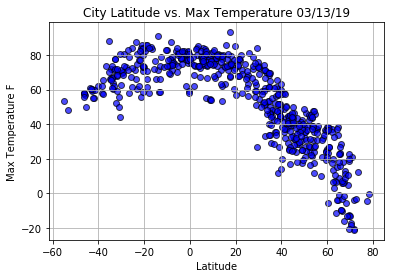

<Figure size 432x288 with 0 Axes>

In [58]:
# make scatter plot to compare latitude and temperature

plt.scatter(cities_data_csv["Lat"], cities_data_csv["Temp"], marker='o', facecolors='blue', edgecolors="black", alpha=.7)
plt.title('City Latitude vs. Max Temperature 03/13/19')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature F')
plt.grid()
plt.show()

plt.savefig('temp_lat.png')

#### Latitude vs. Humidity Plot

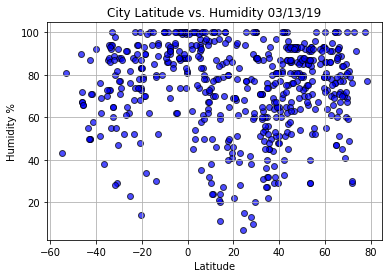

<Figure size 432x288 with 0 Axes>

In [61]:
# make scatter plot to compare lattitude and humidity

plt.scatter(cities_data_csv["Lat"], cities_data_csv["Humidity"], marker='o', facecolors='blue', edgecolors="black", alpha=.7)
plt.title('City Latitude vs. Humidity 03/13/19')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.show()

plt.savefig('humid_lat.png')

#### Latitude vs. Cloudiness Plot

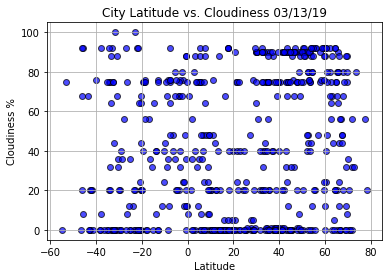

<Figure size 432x288 with 0 Axes>

In [60]:
# make scatter plot to compare latitude and cloudiness

plt.scatter(cities_data_csv["Lat"], cities_data_csv["Cloudiness"], marker='o', facecolors='blue', edgecolors="black", alpha=.7)
plt.title('City Latitude vs. Cloudiness 03/13/19')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.show()

plt.savefig('cloud_lat.png')

#### Latitude vs. Wind Speed Plot

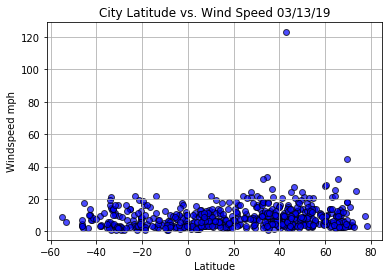

<Figure size 432x288 with 0 Axes>

In [68]:
# make scatter plot to compare latitude and wind speed

plt.scatter(cities_data_csv["Lat"], cities_data_csv["Windspeed"], marker='o', facecolors='blue', edgecolors="black", alpha=.7)
plt.title('City Latitude vs. Wind Speed 03/13/19')
plt.xlabel('Latitude')
plt.ylabel('Windspeed mph')
plt.grid()
plt.show()

plt.savefig('wind_lat.png')